In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [36]:
gambar_1c = cv2.imread("Dataset_P4/1c.jpg")
gambar_1c = cv2.cvtColor(gambar_1c, cv2.COLOR_BGR2RGB)  
gambar_1  = gambar_1c

gambar_1b = cv2.imread("Dataset_P4/1b.jpg")
gambar_1b = cv2.cvtColor(gambar_1b, cv2.COLOR_BGR2RGB)  
gambar_2  = gambar_1b

In [37]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gambar_1,None)
kp2, des2 = sift.detectAndCompute(gambar_2,None)

In [38]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [39]:
# Apply ratio test
tampungKecocokan = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        tampungKecocokan.append(m)
        matches = np.asarray(tampungKecocokan)

In [40]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

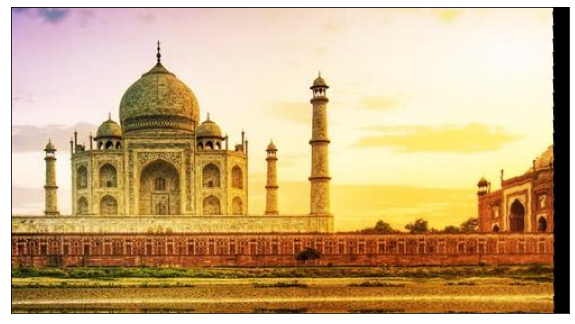

In [41]:
dst = cv2.warpPerspective(gambar_1c,H,(gambar_1b.shape[1] + gambar_1c.shape[1], gambar_1b.shape[0]))
dst[0:gambar_1b.shape[0], 0:gambar_1b.shape[1]] = gambar_1b

h, w = dst.shape[:2]
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
first_pass = True
pixels = np.sum(gray, axis=0).tolist()

# Build new image
for index, value in enumerate(pixels):
    if value == 0:
        continue
    else:
        ROI = dst[0:h, index:index+1]
        if first_pass:
            result = dst[0:h, index+1:index+2]
            first_pass = False
            continue
        result = np.concatenate((result, ROI), axis=1)

plt.figure(figsize = (10,10))
plt.imshow(result)
plt.xticks([]), plt.yticks([])
plt.show()

In [49]:
hasil_gabung_pertama = result

gambar_1a = cv2.imread("Dataset_P4/1a.jpg")
gambar_1a = cv2.cvtColor(gambar_1a, cv2.COLOR_BGR2RGB)  

In [50]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(hasil_gabung_pertama,None)
kp2, des2 = sift.detectAndCompute(gambar_1a,None)

In [51]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [52]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
        matches = np.asarray(good)

In [53]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

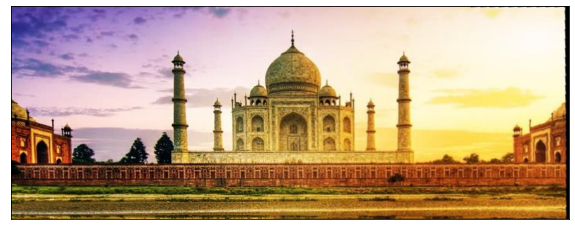

In [54]:
hasil = cv2.warpPerspective(hasil_gabung_pertama,H,(gambar_1a.shape[1] + hasil_gabung_pertama.shape[1], gambar_1a.shape[0]))
hasil[0:gambar_1a.shape[0], 0:gambar_1a.shape[1]] = gambar_1a
plt.figure(figsize = (10,10))
plt.imshow(hasil)
plt.xticks([]), plt.yticks([])
plt.show()